## **CNN with CIFAR-10 Data**

In [32]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

https://www.cs.toronto.edu/~kriz/cifar.html

In [33]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [34]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [35]:
for i in range(0, 10):
    print(X_train[i].shape)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [36]:
# Checking the shape of one image
X_train[7].shape

(32, 32, 3)

In [37]:
X_train[7]

array([[[ 28,  35,  39],
        [ 30,  34,  44],
        [ 33,  44,  47],
        ...,
        [ 43,  56,  45],
        [ 52,  64,  53],
        [ 46,  58,  47]],

       [[ 27,  30,  38],
        [ 27,  28,  41],
        [ 21,  31,  39],
        ...,
        [112, 136,  97],
        [117, 140, 101],
        [115, 138, 100]],

       [[ 34,  36,  42],
        [ 33,  33,  43],
        [ 24,  30,  40],
        ...,
        [175, 208, 143],
        [177, 209, 144],
        [176, 208, 143]],

       ...,

       [[142, 176, 118],
        [142, 176, 118],
        [150, 184, 127],
        ...,
        [134, 175, 119],
        [128, 168, 112],
        [134, 175, 119]],

       [[140, 176, 124],
        [145, 180, 129],
        [150, 186, 134],
        ...,
        [131, 170, 119],
        [130, 170, 119],
        [122, 162, 111]],

       [[134, 171, 123],
        [136, 171, 124],
        [136, 171, 124],
        ...,
        [106, 144, 100],
        [104, 142,  99],
        [101, 140,  96]]

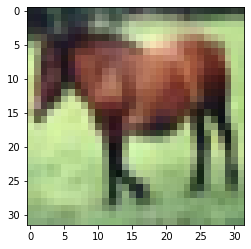

In [38]:
plt.imshow(X_train[7]);

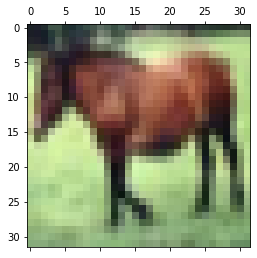

In [39]:
plt.matshow(X_train[7]);

In [40]:
y_train[7]

array([7], dtype=uint8)

In [41]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

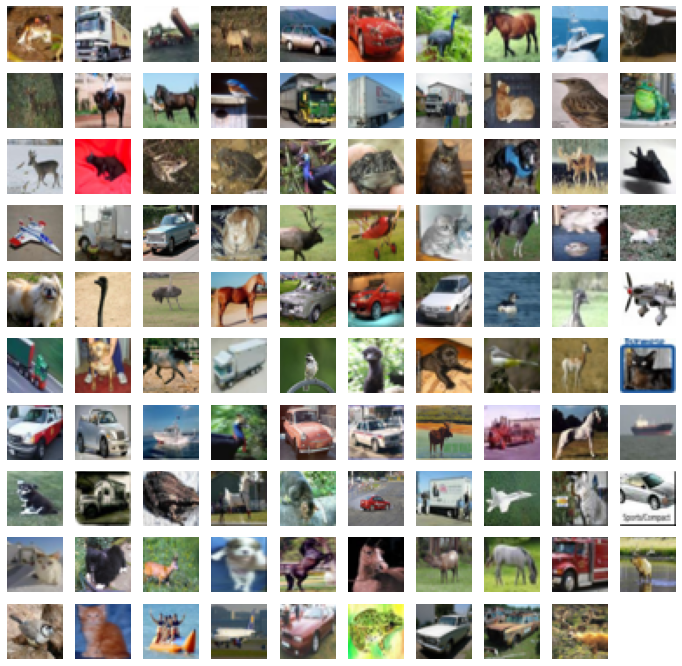

In [42]:
plt.figure(figsize= (12,12))
for i in range(99):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

In [43]:
classes[6]

'frog'

## Data Preprocessing

In [44]:
X_train[5].min()

0

In [45]:
X_train[5].max()

252

In [46]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [47]:
X_train[5].min()

0.0

In [48]:
X_train[5].max()

0.9882353

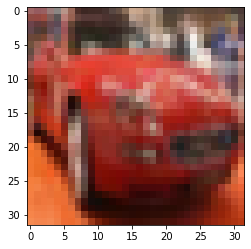

In [49]:
plt.imshow(X_train[5])

In [50]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [51]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [52]:
from tensorflow.keras.utils import to_categorical

In [53]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [55]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test, Y_test), callbacks=[early_stop])


Epoch 1/20
1563/1563 [==============================] - 92s 57ms/step - loss: 1.4843 - accuracy: 0.4643 - val_loss: 1.2326 - val_accuracy: 0.5597
Epoch 2/20
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1447 - accuracy: 0.5999 - val_loss: 1.1138 - val_accuracy: 0.6075
Epoch 3/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9935 - accuracy: 0.6531 - val_loss: 1.0280 - val_accuracy: 0.6331
Epoch 4/20
 705/1563 [============>.................] - ETA: 42s - loss: 0.8832 - accuracy: 0.6909

In [ ]:
model.metrics_names

In [ ]:
model.history.history

In [ ]:
summary

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [31]:
print(model.evaluate(X_train, Y_train, verbose=1))

NameError: name 'model' is not defined

In [41]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [42]:
preds = model.predict(X_test)

In [43]:
preds

array([[2.70694797e-03, 1.61313768e-02, 1.86496298e-03, ...,
        1.99491065e-03, 7.59301009e-03, 1.86360732e-03],
       [1.89120963e-03, 7.48294055e-01, 9.66806546e-09, ...,
        8.32201238e-07, 2.48161122e-01, 1.65263889e-03],
       [5.37384301e-02, 4.07908052e-01, 1.16418535e-03, ...,
        7.35333189e-03, 3.55526894e-01, 1.52250275e-01],
       ...,
       [3.28359420e-07, 1.39648124e-08, 2.53075194e-02, ...,
        8.55901930e-03, 1.32454925e-05, 3.63889239e-06],
       [2.04940569e-02, 3.31649221e-02, 1.76594220e-03, ...,
        2.55800430e-02, 6.87176635e-06, 1.97239220e-03],
       [9.29296431e-11, 9.98468641e-10, 4.78559798e-07, ...,
        9.99395370e-01, 1.98967176e-10, 1.05394760e-09]], dtype=float32)

In [ ]:
preds[0]

In [44]:
predictions = np.argmax(preds, axis=1)

In [45]:
predictions

array([3, 1, 1, ..., 5, 4, 7], dtype=int64)

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1000
           1       0.80      0.81      0.81      1000
           2       0.61      0.58      0.59      1000
           3       0.51      0.50      0.51      1000
           4       0.54      0.73      0.62      1000
           5       0.61      0.58      0.59      1000
           6       0.77      0.73      0.75      1000
           7       0.70      0.76      0.73      1000
           8       0.83      0.73      0.78      1000
           9       0.77      0.76      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.69     10000
weighted avg       0.69      0.68      0.69     10000



In [47]:
print(confusion_matrix(y_test, predictions))

[[665  31  67  26  50  13  21  21  61  45]
 [ 12 812  10  15  13   7  15  11  24  81]
 [ 33   7 578  71 127  68  50  47  12   7]
 [ 16  10  67 500 122 151  52  60   9  13]
 [ 16   2  58  51 728  32  29  68  12   4]
 [  7   3  56 148  94 579  24  78   8   3]
 [  6   4  43  70  97  33 727  13   4   3]
 [  7   6  33  36  83  42  10 762   1  20]
 [ 83  49  14  26  21  12   9   5 729  52]
 [ 27  85  17  31  17  13   5  22  19 764]]


In [48]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9965139627456665
Test accuracy: 0.6844000220298767


In [97]:
my_image = X_test[36]

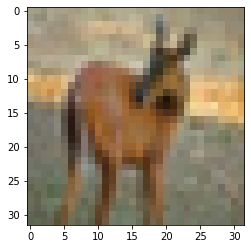

In [98]:
plt.imshow(my_image);

In [99]:
image_prediction=model.predict(my_image.reshape(1,32,32,3))

In [100]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(image_prediction, axis=1)

array([7], dtype=int64)

In [101]:
result=np.argmax(image_prediction, axis=1)
classes[result[0]]

'horse'

In [102]:
model.save("cnn_CIFAR-10.h5")

In [103]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D((2,2)))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))
        
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 128)        

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(X_test,Y_test))

Epoch 1/30
1563/1563 [==============================] - 88s 55ms/step - loss: 1.5336 - accuracy: 0.4366 - val_loss: 1.2775 - val_accuracy: 0.5478
Epoch 2/30
1563/1563 [==============================] - 86s 55ms/step - loss: 1.2190 - accuracy: 0.5636 - val_loss: 1.0469 - val_accuracy: 0.6409
Epoch 3/30
1563/1563 [==============================] - 90s 58ms/step - loss: 1.0906 - accuracy: 0.6113 - val_loss: 0.9515 - val_accuracy: 0.6721
Epoch 4/30
1563/1563 [==============================] - 89s 57ms/step - loss: 1.0012 - accuracy: 0.6463 - val_loss: 0.8861 - val_accuracy: 0.6912
Epoch 5/30
1563/1563 [==============================] - 90s 58ms/step - loss: 0.9429 - accuracy: 0.6684 - val_loss: 0.8561 - val_accuracy: 0.7018
Epoch 6/30
1563/1563 [==============================] - 87s 56ms/step - loss: 0.8924 - accuracy: 0.6869 - val_loss: 0.8170 - val_accuracy: 0.7203
Epoch 7/30
1563/1563 [==============================] - 82s 52ms/step - loss: 0.8503 - accuracy: 0.7029 - val_loss: 0.7760 -

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test, predictions))

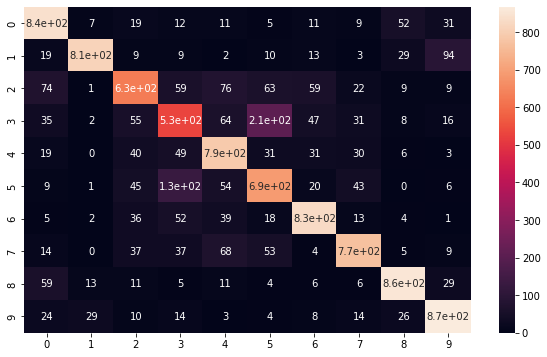

In [156]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [ ]:
model.save("cnn-1.h5")